# Yelp Review Classifier
This notebook serves as a challenge to implement and explore LSTM and Convolution model over the new Yelp review dataset. You have to fill up all the blanks with the hyperparameters that helps you get the best accuracy and loss.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.12.0


## Downloading the TensorFlow `yelp_popularity_review` dataset

> Make sure tensorflow_datasets is installed

In [2]:
##load the yelp reviews dataset
data, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/560000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteDIJFCH/yelp_polarity_reviews-train.t…

Generating test examples...:   0%|          | 0/38000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteDIJFCH/yelp_polarity_reviews-test.tf…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [4]:
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [5]:
##define the parameters for tokenizing and padding
vocab_size = 10000
embedding_dim =32
max_length = 120
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 120, 256)         164864    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 560,961
Trainable params: 560,961
Non-trai

In [9]:
num_epochs = 10
history = model.fit(
    train_padded,
    train_labels,
    epochs=num_epochs,
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
17500/17500 [==============================] - 437s 24ms/step - loss: 0.1994 - accuracy: 0.9187 - val_loss: 0.1451 - val_accuracy: 0.9442
Epoch 2/10
17500/17500 [==============================] - 356s 20ms/step - loss: 0.1467 - accuracy: 0.9421 - val_loss: 0.1340 - val_accuracy: 0.9485
Epoch 3/10
17500/17500 [==============================] - 353s 20ms/step - loss: 0.1252 - accuracy: 0.9514 - val_loss: 0.1293 - val_accuracy: 0.9504
Epoch 4/10
17500/17500 [==============================] - 348s 20ms/step - loss: 0.1081 - accuracy: 0.9588 - val_loss: 0.1406 - val_accuracy: 0.9485
Epoch 5/10
17500/17500 [==============================] - 353s 20ms/step - loss: 0.0920 - accuracy: 0.9657 - val_loss: 0.1407 - val_accuracy: 0.9485
Epoch 6/10
17500/17500 [==============================] - 361s 21ms/step - loss: 0.0765 - accuracy: 0.9721 - val_loss: 0.1486 - val_accuracy: 0.9484
Epoch 7/10
17500/17500 [==============================] - 365s 21ms/step - loss: 0.0628 - accuracy: 0.9777

## Visualise the accuracy and loss

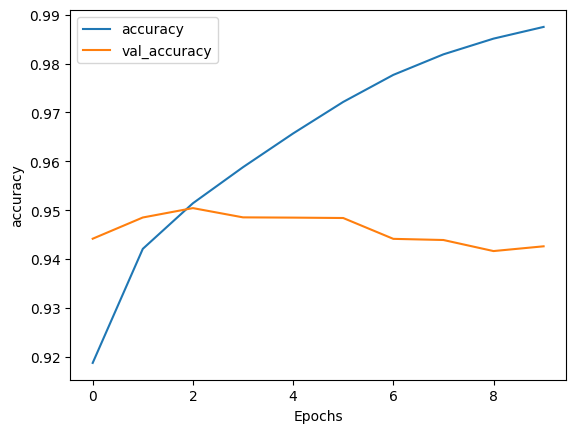

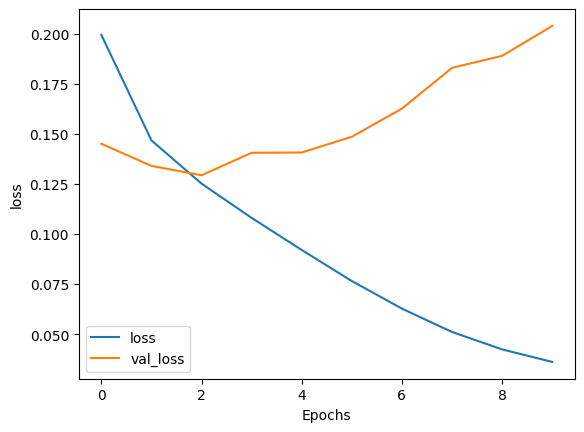

In [10]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classify new reviews

In [11]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 1s 1s/step
[[0.30793598]
 [0.14612721]]
